In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re

dataset_id = "PXD027742" # Indicate Dataset Here

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()

all_channels = ["126","127N","127C","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]

psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = pd.melt(psm_df, id_vars=["File_Name"], value_vars=["126","127N","127C","128N","128C","129N","129C","130N",
                                                            "130C","131N","131C","132N","132C","133N","133C","134N"])

data_dict = {}
info_dict = {}
for dataset in datasets:
    data_dict[dataset] = psm_df.loc[psm_df["File_Name"] == dataset]
    info_dict[dataset] = sdrf_df.loc[sdrf_df["File_Name"] == dataset]
    

channels = []

first_info_df = info_dict[datasets[0]]

# for channel in all_channels:
#     row = first_info_df.index[first_info_df["label"] == channel].tolist()[0]
    
#     channel_type = first_info_df["type"].iloc[row]
    
#     if (channel_type == "single"):
#         channels.append[channel]
    


channels = ["127N","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"] #Excluding 126 and 127C because reasons

medians_df = pd.DataFrame(index=datasets, columns=channels)


for dataset in datasets:
    curr_df =  data_dict[dataset]
    for channel in channels:
        chan_df = curr_df.loc[curr_df["variable"] == channel]
        medians_df.at[dataset, channel] = chan_df['value'].median()
        
medians_df['Median'] = medians_df[channels].median(axis=1)

# psm_df
# sdrf_df
first_info_df
# medians_df


# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

,file name,condition,Plex,label,sample name,type,cell_equivalents,organism,cell-line,replicate,File_Name
0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,126,126,boost,14.0,human,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
1,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,127N,127N,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
2,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,127C,127C,blank,0.0,blank,blank,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
3,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,128N,128N,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
4,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,128C,128C,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
5,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,129N,129N,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
6,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,129C,129C,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
7,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,130N,130N,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
8,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,130C,130C,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...
9,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...,44min_TMT_H14_100pg_AGC300%_1,16.0,131N,131N,single,1.0,human_mixed_ecoli_yeast,HeLa,1.0,20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_...


In [2]:
variance_df = pd.DataFrame(index=datasets, columns=channels)

for dataset in datasets:
    for channel in channels:
        variance_df.at[dataset, channel] = medians_df.at[dataset, channel] / medians_df.at[dataset, "Median"]

# sigmas = variance_df[channels].std()
sigma = np.nanstd(variance_df[channels])
mean = np.nanmean(variance_df[channels])
# print(sigmas)
print(sigma)
print(mean)

for dataset in datasets:
    for channel in channels:
        # curr_col = variance_df[channel]
        if (variance_df.at[dataset, channel] > mean+(5*sigma)):
            
            variance_df.at[dataset, channel] = np.nan
        # variance_df = variance_df[(curr_col <= mean+(5*sigma))]
    
variance_df

0.16749219322708758
1.0241753846676198


,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,0.951413,1.086938,1.085679,1.110143,1.094433,0.990748,1.074336,0.971378,0.986862,0.962671,0.925378,1.091765,0.81969,1.009252
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,0.948523,1.086017,1.069877,1.100083,1.073275,0.99944,1.049049,0.968679,0.994271,0.962196,0.930885,1.089882,0.810489,1.00056
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.435097,1.084406,1.316886,1.05765,1.04874,0.963356,1.008269,0.957588,0.972995,0.926361,0.942938,1.030803,0.805796,0.991731
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.431017,1.073993,1.346725,1.036723,1.032101,0.945983,1.01541,0.946862,0.98459,0.906406,0.897147,1.039832,0.799372,0.973918
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.005624,1.071428,1.096251,1.079741,1.062608,0.973809,1.036624,0.941262,0.955163,0.941703,0.91809,1.078962,0.801542,0.994376
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.010121,1.081089,1.103354,1.100427,1.057957,0.989879,1.055674,0.957003,0.98046,0.957639,0.925754,1.093015,0.80851,0.987213
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,NaN,1.11534,1.71304,1.059451,1.041728,0.966772,1.037353,0.946272,0.960992,0.922715,0.908978,1.026793,0.811214,0.973207
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,NaN,1.094766,1.701888,1.059006,1.032066,0.958586,1.034106,0.931818,0.954167,0.927767,0.916912,1.053215,0.804757,0.967934
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.128676,1.063911,1.164741,1.07675,1.030309,0.956729,1.034597,0.933812,0.961749,0.931728,0.913657,1.054784,0.808183,0.969691
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.132612,1.071775,1.16168,1.059028,1.037615,0.970708,1.018126,0.958704,0.981874,0.929945,0.910366,1.044005,0.814722,0.981202


In [3]:
boost_volumes = set()

variance_df["Carrier Volume"] = ''

variance_df["Injection Time"] = ''

for dataset in datasets:
    info_df = info_dict[dataset]
    
    info_df.reset_index(drop=True, inplace=True)
    
    all_channels = info_df["label"]
    boost_volume = 0
    
    for channel in all_channels:
        row = info_df.index[info_df["label"] == channel].tolist()[0]
        channel_type = info_df["type"].iloc[row]
        if (channel_type == "boost"):
            boost_volume += info_df["cell_equivalents"].iloc[row]
    
    boost_volumes.add(boost_volume)
    
    if "300ms" in dataset:
        variance_df.at[dataset, "Injection Time"] = "300ms"
        
    elif "500ms" in dataset:
        variance_df.at[dataset, "Injection Time"] = "500ms"
    
    variance_df.at[dataset, "Carrier Volume"] = boost_volume
    
variance_df["Carrier Volume"] = pd.to_numeric(variance_df["Carrier Volume"], errors='coerce')
variance_df.sort_values(by=["Carrier Volume"], ascending=True)

variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(int)
# variance_df["Carrier Volume"] = variance_df["Carrier Volume"].astype(str) + "x"


print(boost_volumes)

variance_df

# variance_df.at["20200517_MK_ES_E1200_precol_scMS_300ms_8227_P6_S3", "133N"] = 1.00 # DELETE THIS LATER


{0.0, 98.0, 42.0, 14.0, 434.0, 210.0}


,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N,Carrier Volume,Injection Time
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_1,0.951413,1.086938,1.085679,1.110143,1.094433,0.990748,1.074336,0.971378,0.986862,0.962671,0.925378,1.091765,0.81969,1.009252,14,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H14_100pg_AGC300_2,0.948523,1.086017,1.069877,1.100083,1.073275,0.99944,1.049049,0.968679,0.994271,0.962196,0.930885,1.089882,0.810489,1.00056,14,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_1,1.435097,1.084406,1.316886,1.05765,1.04874,0.963356,1.008269,0.957588,0.972995,0.926361,0.942938,1.030803,0.805796,0.991731,210,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H210_100pg_AGC300_2,1.431017,1.073993,1.346725,1.036723,1.032101,0.945983,1.01541,0.946862,0.98459,0.906406,0.897147,1.039832,0.799372,0.973918,210,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_1,1.005624,1.071428,1.096251,1.079741,1.062608,0.973809,1.036624,0.941262,0.955163,0.941703,0.91809,1.078962,0.801542,0.994376,42,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H42_100pg_AGC300_2,1.010121,1.081089,1.103354,1.100427,1.057957,0.989879,1.055674,0.957003,0.98046,0.957639,0.925754,1.093015,0.80851,0.987213,42,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1,NaN,1.11534,1.71304,1.059451,1.041728,0.966772,1.037353,0.946272,0.960992,0.922715,0.908978,1.026793,0.811214,0.973207,434,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2,NaN,1.094766,1.701888,1.059006,1.032066,0.958586,1.034106,0.931818,0.954167,0.927767,0.916912,1.053215,0.804757,0.967934,434,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_1,1.128676,1.063911,1.164741,1.07675,1.030309,0.956729,1.034597,0.933812,0.961749,0.931728,0.913657,1.054784,0.808183,0.969691,98,
20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H98_100pg_AGC300_2,1.132612,1.071775,1.16168,1.059028,1.037615,0.970708,1.018126,0.958704,0.981874,0.929945,0.910366,1.044005,0.814722,0.981202,98,


In [4]:
counts_df = pd.DataFrame(index=["Above","Below", "Average"], columns=channels)

for channel in channels:
    column = variance_df[channel]
    counts_df.at["Above", channel] = column[column > 1.00].count()
    counts_df.at["Below", channel] = column[column < 1.00].count()
    counts_df.at["Average", channel] = column.mean()
    
counts_df

,127N,128N,128C,129N,129C,130N,130C,131N,131C,132N,132C,133N,133C,134N
Above,6,12,12,12,12,2,12,0,0,0,0,12,0,2
Below,4,0,0,0,0,10,0,12,12,12,12,0,12,10
Average,1.082774,1.079961,1.231829,1.07775,1.044344,0.978153,1.036824,0.951696,0.974751,0.942112,0.920946,1.059187,0.811191,0.985812


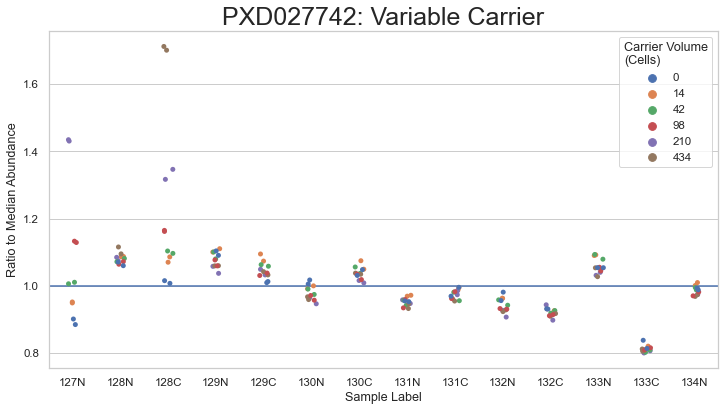

In [5]:
to_graph_df = pd.melt(variance_df, id_vars=["Carrier Volume", "Injection Time"], value_vars=["127N","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"], ignore_index=False)
to_graph_df["Dataset"] = to_graph_df.index
to_graph_df

plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)

sns.set(font_scale=1.05)
sns.set_style("whitegrid")

if (len(boost_volumes) == 1):
    title = dataset_id + ": " + str(round(next(iter(boost_volumes)))) + "x Carrier"
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Injection Time", # color='0', 
                     order=["127N","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
else:
    title = dataset_id + ": Variable Carrier"    
    boxplot = sns.stripplot(data=to_graph_df, x="variable", y="value", jitter=True, hue="Carrier Volume", 
                     order=["127N","128N","128C","129N","129C","130N","130C","131N","131C","132N","132C","133N","133C","134N"]) #, palette = color_match,)
    
    plt.legend(title="Carrier Volume\n(Cells)") # , alignment="center") # Need to Update matplotlib


boxplot.set_title(title, fontsize=25)

plt.axhline(y=1)

boxplot.set(xlabel="Sample Label", ylabel="Ratio to Median Abundance") # Change y label

plt.savefig(dataset_id + "/" + dataset_id + "_median_figure.png", dpi=400)
plt.show()